In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from tensorflow.math import confusion_matrix
import seaborn as sns
from sklearn import metrics
from WorkingPaper.python_model_antoine_ML.DL_logic.cleaning import final_cleaning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('../../raw_data/data_9k.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,id,title,text,topic,subtopic
0,0,0.0,0.0,https://openalex.org/W2100716186,Large-scale screening of hypothetical metal-or...,PUBLISHED ONLINE: 6 NOVEMBER 2011 | DOI: 10.10...,Chemistry,Nanotechnology
1,1,1.0,1.0,https://openalex.org/W2109370530,Routing and wavelength assignment in all-optic...,"[H+./ACM TRANSACTIONS ON NETWORKING, VO1. 3, N...",Computer science,Telecommunications
2,2,2.0,2.0,https://openalex.org/W2131625303,Potassium channel antibody-associated encephal...,"DOI: 10.1093/brain/awh077 Brain (2004), 127, ...",Medicine,Pediatrics
3,3,3.0,3.0,https://openalex.org/W2131736388,"MODBASE, a database of annotated comparative p...","D336–D346 Nucleic Acids Research, 2014, Vol. 4...",Computer science,Bioinformatics
4,4,4.0,4.0,https://openalex.org/W2144966005,Regional brain volume abnormalities and long-t...,ORIGINAL CONTRIBUTION Regional Brain Volume A...,Medicine,Internal medicine


In [3]:
# Reading data 2
data_2 = pd.read_csv('../../raw_data/preprocessed_data.csv')
data_2.head()

,id,title,text,topic,subtopic,total words per text,modified text,words per modified text,broader_subtopic
0,https://openalex.org/w1968762427,rapid amplification of plasmid and phage dna u...,downloaded from genome cshlp org on septem...,biology,molecular biology,23397,"['download', 'genome', 'cshlp', 'org', 'septem...",2303,genetics and molecular biology
1,https://openalex.org/w2099571549,microbial communities in acid mine drainage,abstract the dissolution of sulfide minerals ...,biology,ecology,71203,"['abstract', 'dissolution', 'sulfide', 'minera...",2965,ecology
2,https://openalex.org/w2123562143,polynomial time algorithms for multicast netwo...,abstract the famous max ow min cut theorem st...,mathematics,combinatorics,45200,"['abstract', 'famous', 'max', 'ow', 'min', 'cu...",2774,NaN
3,https://openalex.org/w2149244682,combination immunotherapy of b16 melanoma usin...,combination immunotherapy of b melanoma usin...,biology,cancer research,63844,"['combination', 'immunotherapy', 'melanoma', '...",2884,genetics and molecular biology
4,https://openalex.org/w2536956629,situating the default-mode network along a pri...,abstract background psp is a neuropathologica...,psychology,neuroscience,59152,"['abstract', 'background', 'psp', 'neuropathol...",2901,NaN


In [4]:
data_math = data_2.loc[data_2['topic'] == 'mathematics']
data_phy = data_2.loc[data_2['topic'] == 'physics']
data_biology = data.loc[data['topic'] == 'Biology'][:1000]
data_medecine = data.loc[data['topic'] == 'Medicine'][:1000]



frames = [data_biology[['text','topic']],data_medecine[['text','topic']]]
result = pd.concat(frames)

In [5]:
result['text'] = result['text'].apply(lambda x: final_cleaning(str(x)))

In [6]:
final_data = pd.concat([result[['text','topic']],data_math[['text','topic']],data_phy[['text','topic']]])

In [7]:
final_data.shape

(3548, 2)

In [8]:
data = final_data
data = data.dropna()

In [9]:
data['text'] = data['text'].apply(lambda x : ' '.join(x.split()[0:1000]))

In [10]:
# OneHot Encoding topics
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
topic_targets_enc = pd.DataFrame(enc.fit_transform(data[['topic']]))
topic_targets_enc.columns = enc.get_feature_names_out()

In [11]:
topic_targets_enc.columns

Index(['topic_Biology', 'topic_Medicine', 'topic_mathematics',
       'topic_physics'],
      dtype='object')

In [12]:
data[['topic']].value_counts()

topic      
Biology        1000
Medicine       1000
mathematics     918
physics         630
dtype: int64

In [13]:
data.isnull().sum()

text     0
topic    0
dtype: int64

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data['text'], topic_targets_enc, test_size=0.3)

In [22]:
preprocessor = CountVectorizer(max_df=100,max_features=30000,ngram_range=(2,2))
classifier_SVM = svm.SVC(gamma='auto', C=0.1, kernel='linear')


pipeline_3 = Pipeline(steps=[("preprocesser", preprocessor), ("classifier_SVM", classifier_SVM)])
pipeline_3

Pipeline(steps=[('preprocesser',
                 CountVectorizer(max_df=100, max_features=30000,
                                 ngram_range=(2, 2))),
                ('classifier_SVM', SVC(C=0.1, gamma='auto', kernel='linear'))])

In [23]:
pipeline_3.fit(X_train, np.argmax(np.array(y_train), axis=1))

Pipeline(steps=[('preprocesser',
                 CountVectorizer(max_df=100, max_features=30000,
                                 ngram_range=(2, 2))),
                ('classifier_SVM', SVC(C=0.1, gamma='auto', kernel='linear'))])

In [24]:
pipeline_3.score

<bound method Pipeline.score of Pipeline(steps=[('preprocesser',
                 CountVectorizer(max_df=100, max_features=30000,
                                 ngram_range=(2, 2))),
                ('classifier_SVM', SVC(C=0.1, gamma='auto', kernel='linear'))])>

In [25]:
prediction_pipe = pipeline_3.predict(X_test)

In [26]:
accuracy_score(prediction_pipe, np.argmax(np.array(y_test), axis=1))

0.676056338028169

Confusion matrix:
[[175 132   0   0]
 [169 121   0   0]
 [  3   0 266  25]
 [  3   1  12 158]]
0 topic_Biology
1 topic_Medicine
2 topic_mathematics
3 topic_physics


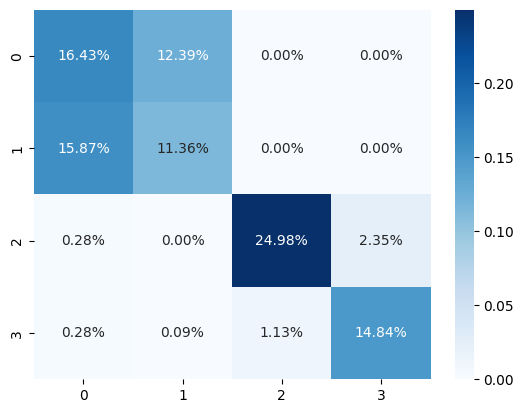

In [27]:
print("Confusion matrix:")
print(metrics.confusion_matrix(np.argmax(np.array(y_test), axis=1), prediction_pipe))

conf_matrix = confusion_matrix(labels=np.argmax(np.array(y_test), axis=1), predictions=prediction_pipe)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
for i, column in enumerate(topic_targets_enc.columns):
    print(i, column)

# saving model

In [28]:
from tensorflow.keras import models
import joblib

def save_model_2(model = None):
    #model.save('WorkingPaper/local/ML_model_layer1.h5')
    path = '../local/ML_model_layer3.joblib'
    joblib.dump(model, path)
    return None

In [29]:
save_model_2(model = pipeline_3)